# Video: Checking Missing Data

This video briefly covers checking for the presence of missing data, and whether missing data indicates significant behavior changes within the data.

In [ ]:
import pandas as pd

In [ ]:
penguins_adelie = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.3&entityid=002f3893385f710df69eeebe893144ff", index_col="Sample Number")
penguins_gentoo = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.3&entityid=e03b43c924f226486f2f0ab6709d2381", index_col="Sample Number")
penguins_chinstrap = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.2&entityid=fe853aa8f7a59aa84cdd3197619ef462", index_col="Sample Number")
penguins = pd.concat([penguins_adelie, penguins_gentoo, penguins_chinstrap])
penguins

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 1 to 68
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Species              344 non-null    object 
 2   Region               344 non-null    object 
 3   Island               344 non-null    object 
 4   Stage                344 non-null    object 
 5   Individual ID        344 non-null    object 
 6   Clutch Completion    344 non-null    object 
 7   Date Egg             344 non-null    object 
 8   Culmen Length (mm)   342 non-null    float64
 9   Culmen Depth (mm)    342 non-null    float64
 10  Flipper Length (mm)  342 non-null    float64
 11  Body Mass (g)        342 non-null    float64
 12  Sex                  334 non-null    object 
 13  Delta 15 N (o/oo)    330 non-null    float64
 14  Delta 13 C (o/oo)    331 non-null    float64
 15  Comments             54 non-null     object 
d

In [ ]:
penguins.groupby(penguins["Comments"].isna()).mean(numeric_only=True)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Comments,,,,,,
False,43.619231,17.623077,196.307692,3913.461538,8.922681,-25.375220
True,43.976207,17.066552,201.741379,4253.448276,8.707271,-25.730271


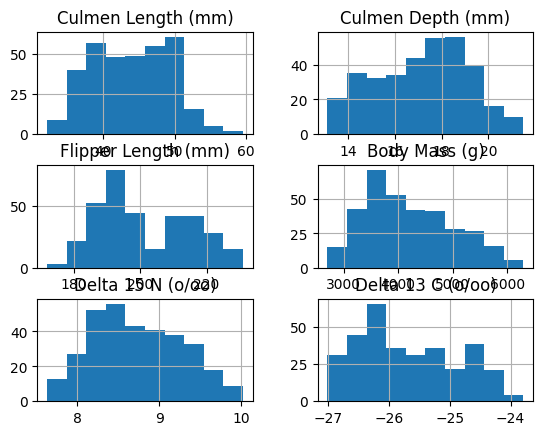

In [ ]:
_ = penguins.hist()

In [ ]:
penguins["Sex"].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [ ]:
penguins.query("Sex == '.'")

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
Sample Number,,,,,,,,,,,,,,,,
117,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N36A1,Yes,2009-12-01,44.5,15.7,217.0,4875.0,.,8.04111,-26.18444,Sexing primers did not amplify.
